In [1]:
#importing the Libraries essential for cleaning and visualization

import pandas as pd #importing the libraries
import matplotlib.pyplot as plt

In [2]:
diabetes_prediction = pd.read_csv('\\Users\\user\\Downloads\\diabetes_prediction_dataset.csv')
#Ascribing a variable to the dateset

In [3]:
diabetes_prediction.head()
#exploring the dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes_prediction.info()
#checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
diabetes_prediction.describe().T

#checking for outliers

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


# Handling Outliers

<Axes: >

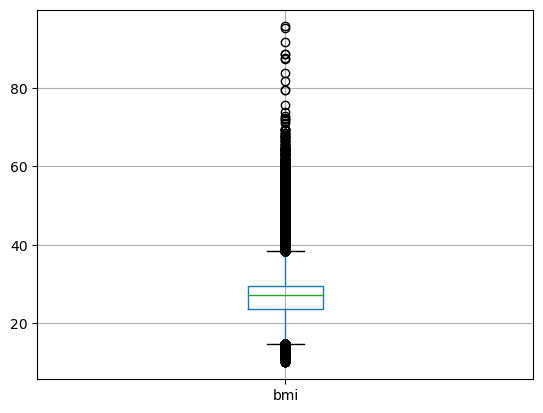

In [6]:
diabetes_prediction.boxplot('bmi') #checking for outliers using Boxplot

In [7]:
 '''Determining the outliers.... the values above Q3 and below Q1
since they are the values that can be gotten by calculating the Q1 AND Q3 values. 
below = Q1 -1.5*IQR
Above = Q3+ 1.5*IQR'''
Q1=diabetes_prediction['bmi'].quantile(0.25)
Q3=diabetes_prediction['bmi'].quantile(0.75)

In [8]:
print(Q1)
print(Q3)

23.63
29.58


In [9]:
IQR=Q3-Q1
IQR

5.949999999999999

In [10]:
outlier_high=Q3+1.5*IQR

In [11]:
outlier_low=Q1-1.5*IQR

In [12]:
print(outlier_high)
print(outlier_low)

38.504999999999995
14.705


In [13]:
msk=(diabetes_prediction['bmi'] < outlier_low) | (diabetes_prediction['bmi'] > outlier_high)

In [14]:
diabetes_prediction[msk]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,Female,54.0,0,0,former,54.70,6.0,100,0
24,Female,4.0,0,0,No Info,13.99,4.0,140,0
39,Female,34.0,0,0,never,56.43,6.2,200,0
59,Female,67.0,0,0,never,63.48,8.8,155,1
93,Male,38.0,0,0,never,55.61,6.5,130,0
...,...,...,...,...,...,...,...,...,...
99933,Female,5.0,0,0,No Info,13.34,6.5,155,0
99948,Female,56.0,1,0,former,39.62,4.5,126,0
99953,Female,59.0,1,0,ever,60.52,3.5,158,0
99960,Female,47.0,0,0,former,45.15,4.0,126,0


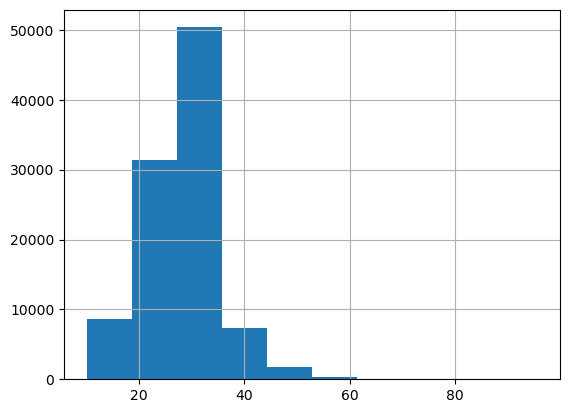

In [15]:
diabetes_prediction['bmi'].hist()
plt.show()

In [16]:
p99=diabetes_prediction['bmi'].quantile(0.99) #calculating 99% of the BMI data

In [17]:
p99

48.790099999999946

In [18]:
diabetes_prediction.loc[diabetes_prediction['bmi'] > p99, 'bmi']=p99
#capping the outliers

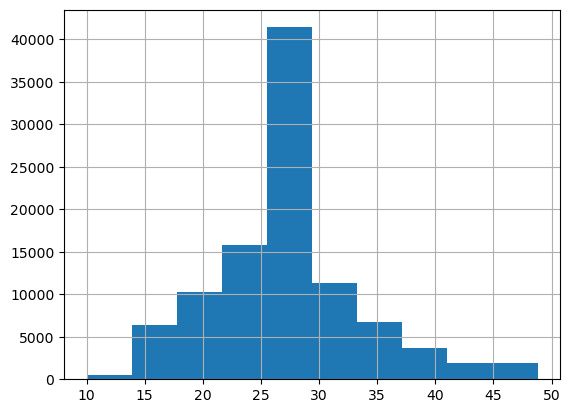

In [19]:
diabetes_prediction['bmi'].hist()
plt.show()

# Performing EDA with the data set

### Agregiating Statistics

In [20]:
diabetes_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [21]:
diabetes_prediction.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.0000
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.0000
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.0000
bmi,100000.0,27.266889,6.410138,10.01,23.63,27.32,29.58,48.7901
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.0000
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.0000
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.0000


In [22]:
diabetes_prediction['age'].mode()

0    80.0
Name: age, dtype: float64

In [23]:
diabetes_prediction['age'].nunique()

102

In [24]:
diabetes_prediction['age'].describe() #Agregiating statistics on the age column

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [25]:
diabetes_prediction['diabetes'].sum()

8500

In [26]:
diabetes_prediction.sort_values('bmi').groupby(by='gender').tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
16702,Other,39.0,0,0,not current,31.2400,6.2,85,0
68484,Other,52.0,0,0,not current,31.6300,6.6,159,0
35006,Other,47.0,0,0,never,36.7600,3.5,200,0
34929,Other,47.0,0,0,never,36.7600,6.6,90,0
75302,Other,26.0,0,0,not current,37.4900,6.0,80,0
74627,Male,39.0,0,0,not current,48.7901,5.7,155,0
9720,Male,55.0,0,0,never,48.7901,6.6,85,0
92975,Male,34.0,0,0,never,48.7901,6.8,159,1
48631,Female,49.0,0,0,former,48.7901,5.0,158,0
25914,Female,62.0,1,0,never,48.7901,6.6,130,1


In [27]:
diabetes_prediction['bmi'].nunique()

3619

ValueError: Image size of 2551x16909661 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

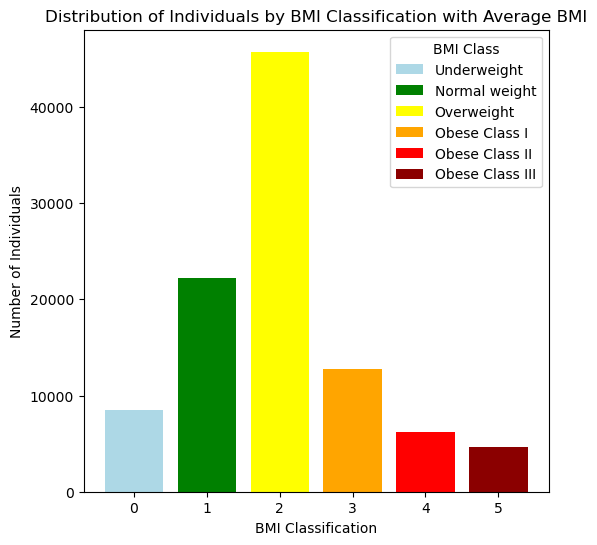

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Define BMI classification ranges based on standard categories
bmi_classification_ranges = [(0, 18.5), (18.5, 25), (25, 30), (30, 35), (35, 40), (40, 80)]

# Create custom mapping function to assign labels
def classify_bmi(bmi):
    for low, high in bmi_classification_ranges:
        if low <= bmi < high:
            return bmi_classification_ranges.index((low, high))
    return -1  # Out-of-range category

# Assign classification labels to a new column
diabetes_prediction['bmi_class'] = diabetes_prediction['bmi'].apply(classify_bmi)

# Group by classification and count individuals
grouped_counts_by_bmi_classification = diabetes_prediction.groupby('bmi_class').size()

# Classifications based on assigned labels
bmi_classifications = [
    "Underweight", "Normal weight", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"
]

# Prepare data for plotting
categories = list(grouped_counts_by_bmi_classification.index)
counts = grouped_counts_by_bmi_classification.values

# Get average BMI values for each category
average_bmi_per_category = diabetes_prediction.groupby('bmi_class')['bmi'].mean()

# Annotate each bar with its average BMI
for i, v in enumerate(counts):
    plt.text(i, v + 0.1, f"{average_bmi_per_category[categories[i]]:.2f}", ha='center')

# Customize the bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(categories, counts, color=['lightblue', 'green', 'yellow', 'orange', 'red', 'darkred'])
plt.xlabel('BMI Classification')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Individuals by BMI Classification with Average BMI')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability

# Add legend
plt.legend(bars, bmi_classifications, title='BMI Class')

# Show the plot
plt.show()


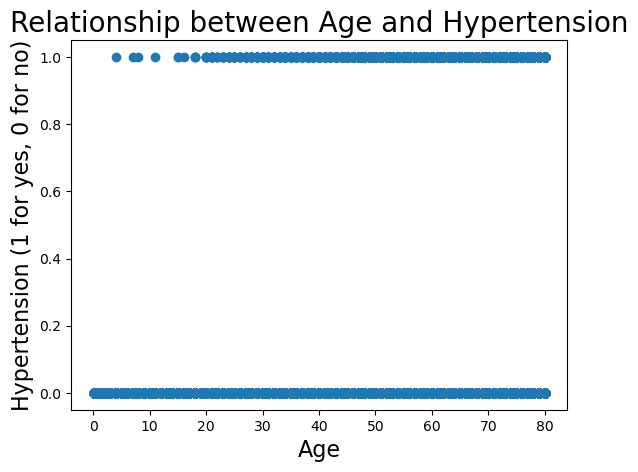

In [29]:
import matplotlib.pyplot as plt

x = diabetes_prediction['age']
y = diabetes_prediction['hypertension']

plt.scatter(x, y)

plt.xlabel('Age', fontsize=16)
plt.ylabel('Hypertension (1 for yes, 0 for no)', fontsize=16)
plt.title('Relationship between Age and Hypertension', fontsize=20)


plt.show()

In [30]:
diabetes_prediction.groupby(['gender','hypertension'])['bmi'].agg(['min', 'max'])

min      max
gender hypertension                
Female 0             10.01  48.7901
       1             11.00  48.7901
Male   0             10.01  48.7901
       1             13.20  48.7901
Other  0             14.09  37.4900

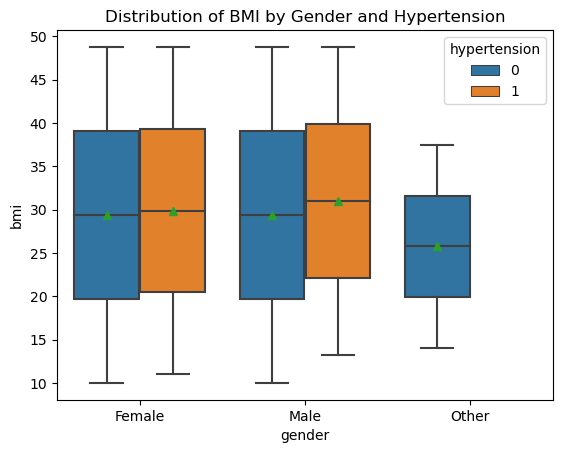

In [31]:


# 1. Import the Seaborn library for visualization
import seaborn as sns

# 2. Group the 'diabetes_prediction' DataFrame by 'gender' and 'hypertension'
#    and calculate the minimum and maximum BMI values for each group
grouped_bmi = diabetes_prediction.groupby(['gender', 'hypertension'])['bmi'].agg(['min', 'max'])

# 3. Reshape the grouped DataFrame using 'reset_index()' and 'melt()'
#    to create separate rows for each combination of 'gender', 'hypertension',
#    and 'stat' (minimum or maximum). The 'value_name' argument renames the
#    BMI column to 'bmi' for clarity.
data = grouped_bmi.reset_index().melt(id_vars=['gender', 'hypertension'], var_name='stat', value_name='bmi')

# 4. Create a boxplot using Seaborn, using 'x' for the gender categories,
#    'y' for the BMI values, 'hue' to differentiate by hypertension levels,
#    and 'showmeans' to display the mean BMI for each group
sns.boxplot(
    x="gender",
    y="bmi",
    hue="hypertension",
    showmeans=True,
    data=data
)

# 5. Set a descriptive title for the plot
plt.title('Distribution of BMI by Gender and Hypertension')

# 6. Display the plot
plt.show()


In [37]:
Grouped_bmi=diabetes_prediction.groupby(['age','hypertension'])['bmi'].agg(['min', 'max'])

<Figure size 1000x800 with 0 Axes>

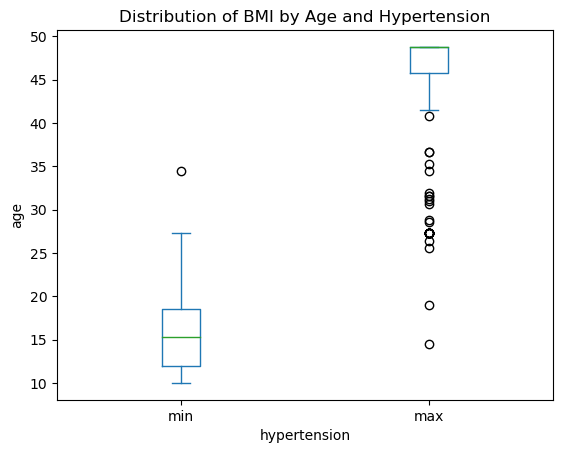

In [49]:
plt.figure(figsize = (10, 8))

Grouped_bmi.plot(kind='box')

plt.ylabel('age')
plt.xlabel('hypertension')
plt.title('Distribution of BMI by Age and Hypertension')

plt.show()

In [54]:
diabetes_prediction.to_csv('\\Users\\user\\Downloads\\diabetes_prediction_data.csv', index=False)